### 1- Problem Statement

The procedure of gaining membership, renting a bike, and returning it is all automatically spread out around a city in bike sharing systems.These systems let users to hire a bike from one spot and drop it off at an other one as required. The dataset details the hourly and daily counts of rental bikes in a bikeshare programme for the years 2011 and 2012, together with the associated weather and seasonal data.It contain the following field:

dteday - hourly date + timestamp  
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter                                                                    
holiday - whether the day is considered a holiday                                          
workingday - whether the day is neither a weekend nor holiday                             
temp - temperature                                                                                     
atemp - "feels like" temperature                                                                              
hum - relative humidity                                                                                               
windspeed - wind speed                                                                                                        
casual - number of non-registered user rentals initiated                                                                  
registered - number of registered user rentals initiated                                                                 
cnt - number of total rentals

When the output variable is a real or continuous value, like "salary" or "weight," then we called it as a regression problem. How to model one or more dependent variables or responses, Y, using a collection of predictor variables, X, is the crux of the regression issue. Likewise, in this dataset Y is total number of rentals of bike which is dependent on the various independent parameters like humidity, windspeed, temperature, workingday etc.

The amount of all bike rentals, which includes both unregistered and registered bikes, depends on the people's working hours, whether those hours are during the week or the weekend, morning or evening. Rental bike demand rises during peak hours and declines during off-peak hours. We can forecast the number of bike rentals with the aid of several machine learning algorithms. However, in order to prepare the day for upcoming training and assessment, we must clean the data before to applying the various regression models.

###### Importing the library to load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### 2- Data Ingestion

Using the pandas library to read he csv file in jupyter notebook. "read_csv" is used to read the csv file whereas df is the name given to the file. The csv file consist of 17379 rows and 17 columns which contain some categorical data and some numerical or dicrete data, some columns also contains the NULL value.

In [2]:
df= pd.read_csv("bike-dataset hour.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
print('The Dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The Dataset has 17379 rows and 17 columns.


###### Numerical Data

Values that may be measured and arranged logically are known as numerical data. Their characteristics are numerical descriptions of the many attributes of an item. There are 15 columns that contains the numerical features. They are instant, season, yr, mnth, hr, holiday, weekday, waethersit etc. These are being extrated from the df dataframe using the select_dtypes keyword.

In [5]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 15 numerical features:
 ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


###### Categorical Data

Categorical data is a body of knowledge that is organised into categories. For instance, the data obtained when an organisation or agency tries to collect the biodata of its personnel is referred to as categorical data. Because the variables in the biodata, including sex, state of residence, etc., may be used to categorise the data, it is known as categorical data. The df dataframe contains the 2 categorical data column i.e. dteday and workingday.

In [6]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} numerical features:\n", catCols)

There are 2 numerical features:
 ['dteday', 'workingday']


###### Statistical description of the dataset

The dataset contains the 17379 rows and 17 columns whose mean value is 8690 nad the standar deviation is 5017.02395. The count shows the number of non-empty values i.e. 17379.00. It also describe the percentile of the dataset i.e. 25%, 50%, 75% where percentile refers to the proportion of values that fall below the specified percentile.

In [8]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15595.000000,15595.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496451,0.475300,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,0.192580,0.171928,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The DataFrame's information is explained using the info() function. The data includes the total number of columns, their labels, data kinds, memory use, range index, and the number of cells in each column (non-null values).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        15595 non-null  float64
 11  atemp       15595 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


Lambda function is an anonymous function which is a special type of function without the using the function name. The unique keyword is used here is to describe the total number of unique values that a column is containing like season having four unique values, yr column containing 2 unique values etc. 

In [10]:
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             51
atemp            66
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

The isnull() keyword is used to identify whether the column contains the null valur or not. In our dataframe i.e. df temp and atemp are the 2 columns that are having the null values. These NULL values can be either filled by using the mean or the median.

In [11]:
df.isnull().sum() ## finding the null values

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp          1784
atemp         1784
hum              0
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

###### Plotting the Graph

In [12]:
import seaborn as sns

The seaborn library is used to plot of bike renting casually and bike renting with registration. From the plot bar we can clearly see that the bike rented eith proper registration are large in number rather than those who have rented the bike casually.

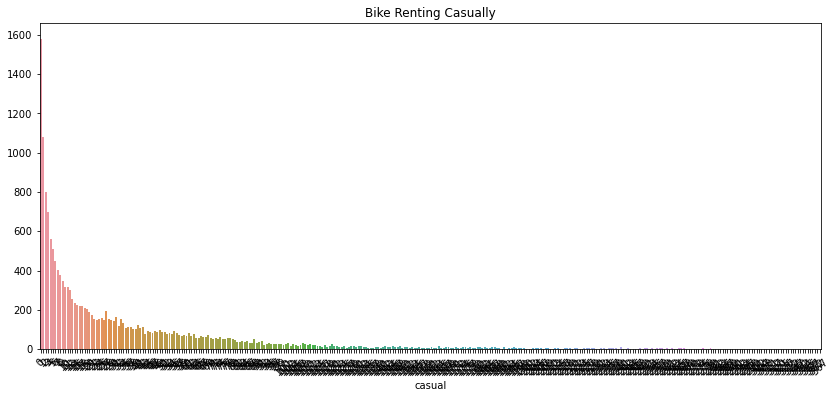

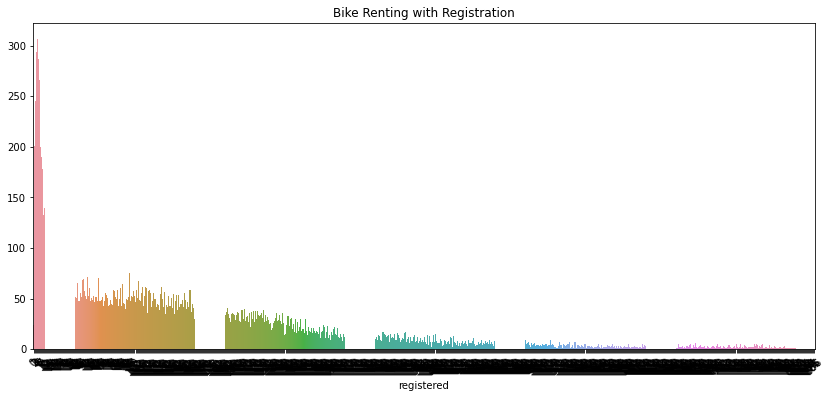

In [13]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_bar(df.value_counts('casual'), 'Bike Renting Casually')
plot_bar(df.value_counts('registered'), 'Bike Renting with Registration')

The jointplot is plotted between the total count vs holiday. On the x-axis, total count is represented and on the y-axis holiday is represented which is 0 or 1. 0 means that there is no holiday and 1 means there is a holiday. We can easliy depict from the jointplot that there are large number of bikes which were rented on holidays in comparision with the non-holidays.

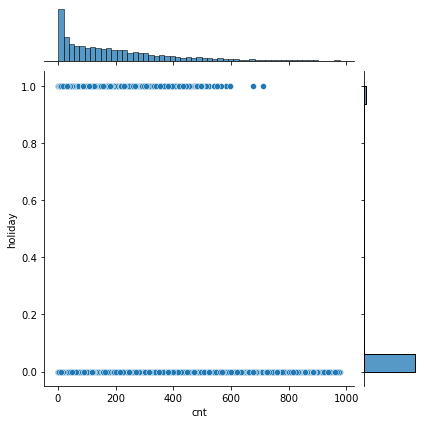

In [14]:
sns.jointplot(data=df, x="cnt", y="holiday")

The jointplot is plotted between the total count vs weekday. On the x-axis, total count is represented and on the y-axis weekday is represented which contains values ranging from 0 to 6. We can easliy depict from the jointplot that there are large number of bikes which were rented on 2,3 and 4 weekdays.

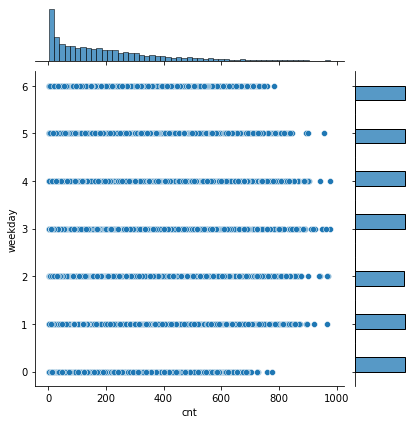

In [15]:
sns.jointplot(data=df, x="cnt", y="weekday")

The jointplot is again plotted between the total count vs month. On the x-axis, total count is represented and on the y-axis month is represented which contains values ranging from 1 to 12 i.e. from January to December. We can easliy depict from the jointplot that there are large number of bikes which were rented on 8,9,10 i.e. in the month of August, September, October and least rented on January and February.

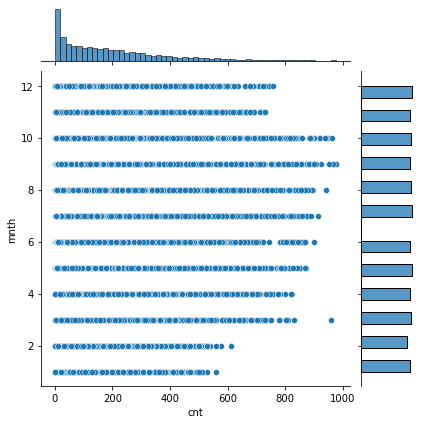

In [16]:
sns.jointplot(data=df, x="cnt", y="mnth")

The jointplot is plotted between the total count vs hour. On the x-axis, total count is represented and on the y-axis hours is represented which contains values ranging from 0 to 24.

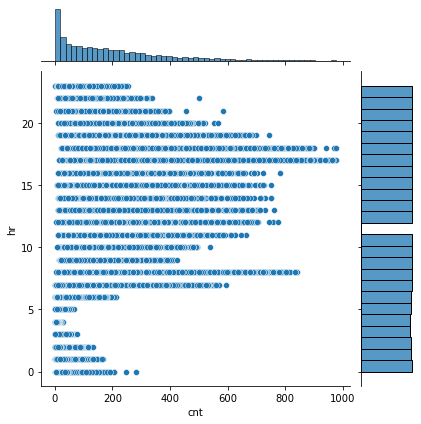

In [17]:
sns.jointplot(data=df, x="cnt", y="hr")

###### 3- Data Preparation

###### Filling the null values with the mean

It is a rather necessary step to edit the data we already have since failing to do so would result in the computer displaying an error message about incorrect input because it is nearly impossible to manually transform a 'NaN' to its mean while processing data that contains it.To get the mean or average of a given list of integers, use the mean() function. The parameter-passed data set's mean is returned. The data total divided by the number of data points yields the arithmetic mean.

In [18]:
mean_value=df['temp'].mean()

The mean value that we got from the temp column is 0.496.We will use this mean value to fill the NULL values which are present in the temp column.

In [19]:
mean_value

0.4964514267393459

The fillna() keyword is used too fill the NULL values which are present in the temp column with the mean value which we have predicted earlier.

In [20]:
df['temp'].fillna(value=mean_value, inplace=True)

In [21]:
df.isnull().sum()

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp         1784
hum              0
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

The mean value that we got from the atemp column is 0.475. We will use this mean value to fill the NULL values which are present in the atemp column.

In [22]:
atemp_mean_value=df['atemp'].mean()

In [23]:
atemp_mean_value

0.47529971785828

The fillna() keyword is used too fill the NULL values which are present in the atemp column with the mean value which we have predicted earlier.

In [24]:
df['atemp'].fillna(value=atemp_mean_value, inplace=True)

Earlier when we have used the isnull() keyword then at that time temp and atemp were the 2 columns that were containing the NULL values i.e. 1784 rows of that column were having the NULL values which now are being filled with the mean values. Now the df dataframe does not contain any column which have NULL values.

In [25]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [26]:
df.head(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.240000,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.220000,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.220000,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.240000,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.240000,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.240000,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.220000,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.200000,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.240000,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.320000,0.3485,0.76,0.0000,8,6,14


###### Plotting the data

In [27]:
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [28]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

The factorplot is plotted using the seaborn library which between weekday and the count. The week day is represented on the x-axis while the count is represented on the y-axis. The weekeday are ranging from 0 to 6. From the plot we can depict that on 0 and 6 weekday most number of bikes are being rented because there count is high. 0 means sunday and 6 means Saturday.

F:\software\Ananconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
F:\software\Ananconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


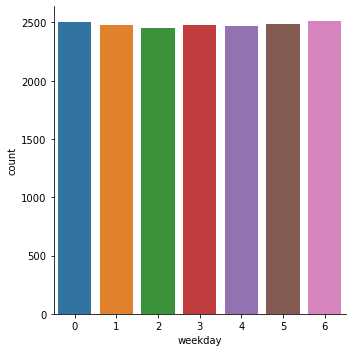

In [29]:
sns.factorplot(x='weekday', data=df, kind='count', size=5, aspect=1)

From the season vs count we can clearly see that the demand of bikes increses is more in season 2 and 3 in comparision to the season 1 and 4.

<AxesSubplot:xlabel='season', ylabel='cnt'>

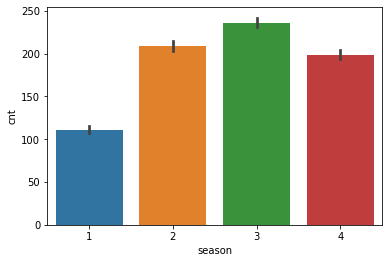

In [30]:
sns.barplot(x='season', y='cnt', data=df)

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

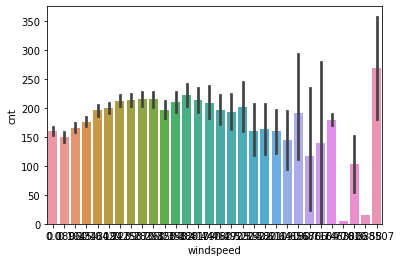

In [31]:
sns.barplot(x='windspeed', y='cnt', data=df)

Dropping the column like year, month,day etc which do not have large amount effect on the dependent values. It will only increase our computational time and can add noise or improper results if we don not drop these columns.

In [32]:
df=df.drop(columns= ['yr', 'mnth','dteday', 'casual','registered'])

In [33]:
df

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,16
1,2,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,40
2,3,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,32
3,4,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,13
4,5,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,19,0,1,Yes,2,0.26,0.2576,0.60,0.1642,119
17375,17376,1,20,0,1,Yes,2,0.26,0.2576,0.60,0.1642,89
17376,17377,1,21,0,1,Yes,1,0.26,0.2576,0.60,0.1642,90
17377,17378,1,22,0,1,Yes,1,0.26,0.2727,0.56,0.1343,61


Creating a new field that displays whether or not it is night time. This would help us to understand that when people are renting the bikes more often. The time from 10PM to 4AM is considered as the night time in this study. So, if the time comes under the mentioned range then Yes will be filled in the column which will tell us that it is a night time and remaining rows will be filled from No which will tell us that it is not a night time.

In [34]:
df.loc[df['hr'] >= 22, 'night_time'] = 'Yes'
df.loc[(df['hr'] == 0) | (df['hr'] < 5), 'night_time'] = 'Yes'
df.loc[df['night_time'].isnull(), 'night_time'] = 'No'

In [35]:
df.head(25)

,instant,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,night_time
0,1,1,0,0,6,No,1,0.240000,0.2879,0.81,0.0000,16,Yes
1,2,1,1,0,6,No,1,0.220000,0.2727,0.80,0.0000,40,Yes
2,3,1,2,0,6,No,1,0.220000,0.2727,0.80,0.0000,32,Yes
3,4,1,3,0,6,No,1,0.240000,0.2879,0.75,0.0000,13,Yes
4,5,1,4,0,6,No,1,0.240000,0.2879,0.75,0.0000,1,Yes
5,6,1,5,0,6,No,2,0.240000,0.2576,0.75,0.0896,1,No
6,7,1,6,0,6,No,1,0.220000,0.2727,0.80,0.0000,2,No
7,8,1,7,0,6,No,1,0.200000,0.2576,0.86,0.0000,3,No
8,9,1,8,0,6,No,1,0.240000,0.2879,0.75,0.0000,8,No
9,10,1,9,0,6,No,1,0.320000,0.3485,0.76,0.0000,14,No


###### Encoding the workingday data

Categorical variables often take the form of "strings" or "categories" and have a limited number of possible values for example-the city where a person lives: Delhi, Mumbai, Ahmedabad, Bangalore, etc, the grades of a student:  A+, A, B+, B, B- etc.

There are two kinds of categorical data-

Ordinal Data: The categories have an inherent order
Nominal Data: The categories do not have an inherent order

###### Ordinal Data 
When encoding ordinal data, it is important to keep track of the order in which the categories are given.

###### Nominal Data
We must take into account a feature's existence or absence while encoding nominal data. There is no concept of order in such a situation. For instance, the city in which a person resides.

There are two type of encoders which can be used to solve the categorial problem:
a) Label Encoding
b) One hot encoding

###### Label Encoding
When the categorical feature is ordinal, we use this method of categorical data encoding. Retaining the order in this situation is crucial. So, the sequence should be reflected in the encoding. Each label is transformed into an integer value during label encoding.

###### One Hot Encoding
When the characteristics are nominal, we use this method of categorical data encoding (do not have any order). We produce a new variable in a single hot encoding for each level of a category feature. A binary variable with the values 0 or 1 is assigned to each category. In this case, 0 denotes the lack of that category while 1 denotes its existence.

Dummy variables are the name given to these just constructed binary characteristics. The category variable's levels determine how many dummy variables are needed.

In [36]:
pd.get_dummies(df['workingday'], prefix='workingday')

,workingday_No,workingday_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17374,0,1
17375,0,1
17376,0,1
17377,0,1


In [37]:
df_oh= df

def one_hot_encoding(data,column):
    data= pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data= data.drop([column], axis=1)
    return data
cols= ['workingday']

for col in cols:
    df_oh= one_hot_encoding(df_oh, col)

In [38]:
df_oh.head(60)

,instant,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,night_time,workingday_No,workingday_Yes
0,1,1,0,0,6,1,0.240000,0.2879,0.81,0.0000,16,Yes,1,0
1,2,1,1,0,6,1,0.220000,0.2727,0.80,0.0000,40,Yes,1,0
2,3,1,2,0,6,1,0.220000,0.2727,0.80,0.0000,32,Yes,1,0
3,4,1,3,0,6,1,0.240000,0.2879,0.75,0.0000,13,Yes,1,0
4,5,1,4,0,6,1,0.240000,0.2879,0.75,0.0000,1,Yes,1,0
5,6,1,5,0,6,2,0.240000,0.2576,0.75,0.0896,1,No,1,0
6,7,1,6,0,6,1,0.220000,0.2727,0.80,0.0000,2,No,1,0
7,8,1,7,0,6,1,0.200000,0.2576,0.86,0.0000,3,No,1,0
8,9,1,8,0,6,1,0.240000,0.2879,0.75,0.0000,8,No,1,0
9,10,1,9,0,6,1,0.320000,0.3485,0.76,0.0000,14,No,1,0


Adding the peak hours column which indicates whether it is a peak time or not. The peak hours depend upon the working day. IF it is a working day then the peak hours will be different and if it is not a working days then the peak hours will be different. The peak hours helps us to understand the pattern of renting the bikes. The peak function is being defined in which certain condition are applied like if hr is between 7AM to 9AM, 4PM to 7PM and if it is a non-working day then it will be considered as a peak hour and Yes value will be assigned in the specific rows of Peak Hours column. Where as in the case of working days the condition is being changed. If the hr is inbetween 10AM to 4PM then it would be considered as a Peak Hour.

In [39]:
def peak(df):
    if (df['hr'] >= 7) and (df['hr'] < 10) and (df['workingday_Yes'] == 1):
        return "Yes"
    elif (df['hr'] >= 16) and (df['hr'] <= 19) and (df['workingday_Yes'] == 1):
        return "Yes"
    elif (df['hr'] >= 10) and (df['hr'] <= 16) and (df['workingday_No'] == 1):
        return "Yes"
    else:
        return "No"

df_oh['Peak_Hours']= df_oh.apply(peak, axis=1)

In [40]:
df_oh.head(50)

,instant,season,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,night_time,workingday_No,workingday_Yes,Peak_Hours
0,1,1,0,0,6,1,0.240000,0.2879,0.81,0.0000,16,Yes,1,0,No
1,2,1,1,0,6,1,0.220000,0.2727,0.80,0.0000,40,Yes,1,0,No
2,3,1,2,0,6,1,0.220000,0.2727,0.80,0.0000,32,Yes,1,0,No
3,4,1,3,0,6,1,0.240000,0.2879,0.75,0.0000,13,Yes,1,0,No
4,5,1,4,0,6,1,0.240000,0.2879,0.75,0.0000,1,Yes,1,0,No
5,6,1,5,0,6,2,0.240000,0.2576,0.75,0.0896,1,No,1,0,No
6,7,1,6,0,6,1,0.220000,0.2727,0.80,0.0000,2,No,1,0,No
7,8,1,7,0,6,1,0.200000,0.2576,0.86,0.0000,3,No,1,0,No
8,9,1,8,0,6,1,0.240000,0.2879,0.75,0.0000,8,No,1,0,No
9,10,1,9,0,6,1,0.320000,0.3485,0.76,0.0000,14,No,1,0,No


Applying the one hot encoding on the different columns like season, hour, weekday etc because the characteristics which are present here are nominal.                                                                                                   
Data binding is the procedure that synchronises and links two data sources. When a data set's element is changed, data binding causes the bound data set to update automatically.Data binding may be used for a variety of purposes, including text box components, data input, reporting, and connecting an application's user interface (UI) with the data it displays. Additionally, it enables online users to alter data representation in various web page components without the need for convoluted scripting or programming procedures. In this dataset, data binding is not required because currently we dont have data provider and data consumer at present. 

The night time and the peak hours are the two columns that are categorical in nature. They contain the Yes and No values rather than 0 or 1. So, with the help of one hot encoding we will assign the binary number to these categorical value.

In [41]:
dff_oh= df_oh

def one_hot_encoding(data,column):
    data= pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data= data.drop([column], axis=1)
    return data

one_col= ['hr', 'season','weekday','night_time', 'Peak_Hours']

for colum in one_col:
    dff_oh= one_hot_encoding(dff_oh, colum)

In [42]:
dff_oh.head(5)

,instant,holiday,weathersit,temp,atemp,hum,windspeed,cnt,workingday_No,workingday_Yes,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,night_time_No,night_time_Yes,Peak_Hours_No,Peak_Hours_Yes
0,1,0,1,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,1,0,1,1,0
1,2,0,1,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,1,0,1,1,0
2,3,0,1,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,1,0,1,1,0
3,4,0,1,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,1,0,1,1,0
4,5,0,1,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,1,0,1,1,0


In [38]:
dff_oh.shape

(17379, 52)

###### Data Segregation
After dropping the unuseful columns, now we can segreagate our data into a independent and dependent variable. Here we called "X" as an independent variable and "Y" as an dependent one. "Y" is predicted on the basis of "X". In our dataset,total bike rented count i.e. cnt is the dependent variable and rest which are effecting it are the independent variable.

In [39]:
X=dff_oh.drop(columns=['instant', 'cnt'], axis=1)

In [40]:
X

,holiday,temp,atemp,hum,windspeed,workingday_No,workingday_Yes,season_1,season_2,season_3,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,night_time_No,night_time_Yes,Peak_Hours_No,Peak_Hours_Yes
0,0,0.24,0.2879,0.81,0.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0
1,0,0.22,0.2727,0.80,0.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0
2,0,0.22,0.2727,0.80,0.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0
3,0,0.24,0.2879,0.75,0.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0
4,0,0.24,0.2879,0.75,0.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,0.26,0.2576,0.60,0.1642,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
17375,0,0.26,0.2576,0.60,0.1642,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
17376,0,0.26,0.2576,0.60,0.1642,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
17377,0,0.26,0.2727,0.56,0.1343,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [41]:
X.shape

(17379, 50)

In [42]:
Y=dff_oh['cnt']

In [43]:
Y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [44]:
Y.shape

(17379,)

###### Splitting the data
With the help of sklearn library we can import train test split which will help us to divide our data into two phases i.e. traing and testing. Data splitting is a crucial component in building data-driven models. This method aids in ensuring the accuracy of data model construction and the processes that employ data models, such as machine learning. When machine learning algorithms are used to generate predictions on data that was not used to train the model, their performance is estimated using the train-test split technique. It is a quick and simple process to carry out, and the results let you evaluate the effectiveness of machine learning algorithms for your particular predictive modelling issue.

However, in reality, we frequently question whether the current model is actually sufficient. If we simply use all the available data to establish the parameters of the model in such circumstances, we frequently experience overfitting, which occurs when the model accurately describes all the data without actually being sufficient(D. J. Sheskin, Handbook of Parametric and Nonparametric Statistical Procedures, Chapman and Hall/CRC, Boca Raton, Florida, 2011). 

According to empirical study, the best results are obtained when 20–30% of the initial data points are used for testing and the remaining 70–80% for training.
For this division, we obtain accuracy estimates that are both the most accurate among the valid estimates, that is, their overestimation of the approximation error is as small as it can be, and valid in the sense that they do not overestimate the accuracy (i.e., do not underestimate the approximation error)(Stone, M. “Cross-Validatory Choice and Assessment of Statistical Predictions.” Journal of the Royal Statistical Society. Series B (Methodological), vol. 36, no. 2, 1974, pp. 111–47. JSTOR, http://www.jstor.org/stable/2984809. Accessed 2 Dec. 2022).

In [45]:
from sklearn.model_selection import train_test_split

The train test split is imported from the sklearn library in order to split our dataset i.e. X and Y into testing and training dataset. Three tectonic movements are represented by the 70/30 Principle, which collectively upend our stale and outdated conventional learning paradigm. The approach rebalances the learning equation by focusing on the learner rather than the instructor, shifting the emphasis to "how" teachers teach rather than "what" teachers teach, and encouraging active rather than passive learning (Sajjan, Mahantesh. (2020). Re: 70% training and 30% testing spit method in machine learning.. Retrieved from: https://www.researchgate.net/post/70_training_and_30_testing_spit_method_in_machine_learning/5eec743bd027d10a5f743b00/citation/download).By keeping the above mentioned thing in mind, 70-30 split is done i.e 70% of the data is taken for the testing aprt and rest 30% is for the traing part in order to validate the results.

In [46]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30, random_state=42)

In [47]:
X_train.shape

(12165, 50)

In [1]:
X_test.shape

NameError: name 'X_test' is not defined

### Linear Regression 

A variable's value may be predicted using linear regression analysis based on the value of another variable. The dependent variable is the one you want to be able to forecast. The independent variable is the one you're using to make a prediction about the value of the other variable. With the help of one or more independent variables that can most accurately predict the value of the dependent variable, this kind of analysis calculates the coefficients of the linear equation. The differences between expected and actual output values are minimised by linear regression by fitting a straight line or surface. The best-fit line for a set of paired data may be found using simple linear regression calculators that use the "least squares" technique. Then, using Y, you estimate the value of X (the dependent variable) (independent variable) (Kumari, Khushbu & Yadav, Suniti. (2018). Linear regression analysis study. Journal of the Practice of Cardiovascular Sciences. 4. 33. 10.4103/jpcs.jpcs_8_18). 

Examples of linear regression include product sales, price, performance, risk, etc. Because they may quantify the magnitude of the effect on the dependent variable using "parameter estimates" or "coefficients," independent variables are also known as explanatory variables.

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear= LinearRegression()
linear

LinearRegression()

In [51]:
linear.fit(X_train, Y_train)
y_pred_lin= linear.predict(X_test)

In [52]:
y_pred_lin

array([294.703125 , 178.796875 ,  27.96875  , ..., 456.8984375,
       219.734375 , -33.953125 ])

The sum of squares regression (SSR) to sum of squares total ratio is known as R-Squared. Sum of Squares Regression (SSR) measures the total deviation of all predicted values from the mean value of all response variable values as observed on the regression line or plane.To evaluate the goodness of fit or best-fit line, the R-squared value is used. The better the R-Squared value, the more accurately the regression model captures the variation between actual values and the mean value.

The error of the estimator or prediction model developed using the specified set of observations in the sample is represented by the Mean squared error (MSE). By comparing the predictions generated on the complete training dataset to the actual label or output value, the MSE is used to intuitively assess the model's quality.(Vrdoljak, Anton. (2022). https://www.researchgate.net/post/What-is-the-acceptable-R-squared-in-the-information-system-research-Can-you-provide-some-references/629b8a7b1489d10ffe21fd63/citation/download). 

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

The accuracy which we are getting is nearly 72% after running the linear regression model which means our model is predicting the 72% values of the dpenedent variable i.e. of "Y" correctly. The accuracy is not so good but it is acceptable. We can tune the hyperparameters in order to increase the accuracy a more higher and make our model more robust.

In [93]:
base_accuracy= r2_score(Y_test, y_pred_lin)*100
print("R2 score: ",base_accuracy)



var= explained_variance_score(Y_test, y_pred_lin)*100
print("Explained Variance: ", var)

R2 score:  72.46519520840471
Explained Variance:  72.48910537009765


###### Tuning the Hyperparameters of Linear Regression using Random Search

In order to increse the accuarcy we can tune the hyperparameters of the linera regression model. This can be done using Grid SearchCV or RandomizedSearchCV. In this dataset, RandomizedSearchCV is used to hypertune the parameters. The main difference between the two methods is that in grid search, we specify the combinations and train the model, but in RandomizedSearchCV, the combinations are chosen at random by the model. Both approaches are particularly efficient for fine-tuning the variables that enhance the generalizability of the model (https://doi.org/10.48550/arXiv.1912.06059).

Alpha is a parameter used for Regularization that linearly combines the L1 and L2 penalties of the lasso and ridge methods. For alpha = 0 the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. For alpha in (0,1) the penalty is a combination of L1 and L2(https://documentation.mindsphere.io/resources/html/predictive-learning/en-US/Linear_Regression_Analysis.htm). With the help of RandomizedSearchCV we will find the adequate value of alpha. Then we will use this value in oder to again run our model by fitinh this in our X_train and Y_train dataset.

In [110]:
from sklearn.model_selection import RandomizedSearchCV


ridge=Ridge()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.4, 0.5,  0.8, 0.9, 1.0, 2.0, 5.0, 6.0, 9.0, 
                    10.0,50, 100, 500, 1000 ]}
folds = 5

rand_cv_model = RandomizedSearchCV(ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

y_pred_hyper= rand_cv_model.fit(X_train, Y_train)


Fitting 5 folds for each of 19 candidates, totalling 95 fits


In [111]:
rand_cv_model.best_params_

{'alpha': 10.0}

In [113]:
y_pred_grid= y_pred_hyper.predict(X_test)

In [115]:
y_pred_grid

array([292.28059227, 180.89876443,  29.06819124, ..., 455.13045798,
       219.36751009, -32.12216454])

In [116]:
accuracy= r2_score(Y_test, y_pred_grid)*100
print("R2 score: ",accuracy)



var= explained_variance_score(Y_test, y_pred_grid)*100
print("Explained Variance: ", var)

R2 score:  72.50188616233967
Explained Variance:  72.52648628554286


###### Comparing the base model with the optimized model and we found that after optimizing the hyper-parameters our model become 0.05% more efficient than the base model.

Both the models are being compared i.e. base model without hypertuning the parameters and optimised model by hypertunung the parameter i.e finding the adequate value of alpha using the RandomizedSearchCV and found that there is not much improvemnt in the model. The optimised model has become 0.05% more efficient than the base model but that is not great increase in the percentage.

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (accuracy - base_accuracy) / base_accuracy))

## Random Forest Regressor
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. On various samples, it constructs decision trees and uses their average for classification and majority vote for regression.
The Random Forest Algorithm's ability to handle data sets with both continuous variables, as in regression, and categorical variables, as in classification, is one of its most crucial qualities. In terms of categorization issues, it delivers superior outcomes (Breiman, L. Random Forests. Machine Learning 45, 5–32 (2001). https://doi.org/10.1023/A:1010933404324). 

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
model_rfg= RandomForestRegressor()

In [67]:
model_rfg.fit(X_train, Y_train)

y_pred_ran= model_rfg.predict(X_test)

In [68]:
y_pred_ran

array([339.51      , 107.1       ,  11.40633333, ..., 522.1       ,
       230.11      ,  41.32      ])

The sum of squares regression (SSR) to sum of squares total ratio is known as R-Squared. Sum of Squares Regression (SSR) measures the total deviation of all predicted values from the mean value of all response variable values as observed on the regression line or plane.To evaluate the goodness of fit or best-fit line, the R-squared value is used. The better the R-Squared value, the more accurately the regression model captures the variation between actual values and the mean value.

The error of the estimator or prediction model developed using the specified set of observations in the sample is represented by the Mean squared error (MSE). By comparing the predictions generated on the complete training dataset to the actual label or output value, the MSE is used to intuitively assess the model's quality.(Vrdoljak, Anton. (2022). https://www.researchgate.net/post/What-is-the-acceptable-R-squared-in-the-information-system-research-Can-you-provide-some-references/629b8a7b1489d10ffe21fd63/citation/download).

The accuracy we get without tuning the hyper-parameters using random forest classifier is 83% which means our model is predicting the 83% values of the dpenedent variable i.e. of "Y" correctly. The accuracy is not so good but it is acceptable. We can tune the hyperparameters in order to increase the accuracy a more higher and make our model more robust.

In [69]:
base_accuracy= r2_score(Y_test, y_pred_ran)*100
print("R2 score: ",base_accuracy)


var= explained_variance_score(Y_test, y_pred_ran)*100
print("Explained Variance: ", var)

R2 score:  83.71252987638951
Explained Variance:  83.72378085473227


###### Tuning the Hyperparameters of Random Rorest Regressor using Random Search

In order to make our Random Forest model more efficient and accurate we will tune the hyperparameters of this model.The various hyperparameters are:-                                                                                                                                                                                                                                    

a) n_estimators- it represent the number of trees in the forest.
                                                                                                                   
b) max_features- it represent the number of features to consider when looking for the best split.
                                                                                                                             
c) max_depth- it represent the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
                                                                                                                              
d) min_samples_split- it represent the minimum number of samples required to split an internal node.
                                                                                                                          
e) min_sample_leaf- it represent the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model.
                                                                                                                              
f) bootstrap- whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [52]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [53]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

After running the RandomizedSearchCV, the values of the hyperparameters after tuning them are:                           

a) n_estimators- 1800                                                                                                    
b) min_samples_leaf- 1                                                                                                        
c) min_samples_split- 10                                                                                                     
d) max_depth- 30                                                                                                               e) bootstrap- False                                                                                                           
f) max_features- sqrt

In [54]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

To make our Random Forest model more efficient, we will use the above values which we get after tuning the hyperparameters. Again we will fit this into our X_train and y_Train model.

In [70]:
model_rfg_hyper= RandomForestRegressor(n_estimators= 1800, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth=30, bootstrap = 'False')


In [71]:
model_rfg_hyper.fit(X_train, Y_train)

y_pred_hyper= model_rfg_hyper.predict(X_test)

In [72]:
y_pred_hyper

array([354.38560914, 136.47815707,  14.52324578, ..., 475.48952958,
       221.90859562,  47.53340654])

In [73]:
accuracy= r2_score(Y_test, y_pred_ran_hyper)*100
print("R2 score: ",accuracy)


var= explained_variance_score(Y_test, y_pred_ran)*100
print("Explained Variance: ", var)

R2 score:  84.33689431940773
Explained Variance:  83.72378085473227


###### Comparing the base model with the optimized model and we found that after optimizing the hyper-parameters our model become 0.75% more efficient than the base model.

Both the models are being compared i.e. base model without hypertuning the parameters and optimised model by hypertunung the parameter i.e finding the adequate value of  n_estimators, min_samples_leaf, min_samples_split,max_features, max_depth and bootstrap  using the RandomizedSearchCV and found that thers is 0.75% improvemnt in the model. The optimised model has become 0.75% more efficient than the base model.

In [74]:
print('Improvement of {:0.2f}%.'.format( 100 * (accuracy - base_accuracy) / base_accuracy))

Improvement of 0.75%.


###### Conclusion

The dataset contains the details of the hourly and daily counts of rental bikes in a bikeshare programme for the years 2011 and 2012. There were various rows whcih contains the NUll values which were filled by the mean value during the data cleaning process. Two new columns were added in the dataset i.e. night time and peak hours in order to find the dependency between the rental bikes and night time and also the dependency between the rental bikes and peak hours. The datset also contains the categorical data and by using the one hot encoding the binary number 0 and 1 were assigned to these categorical columns because during building the model it is necessary to convert them into the numnerical value else our model will nit able to read them.
The unnesessary columns were being droped because they were not containing any proper relevance and were also not effecting the dependent variable that much. The dataset was splitted into 70-30% ratio i.e. 70% of the data for the training aprt and 30% of the data for the testing part. There are various regression model,cbut in this work two models are used i.e. Linear Regressor and the Random Forest Regressor.The Random Forest Regressor shows the better result than the Linear Regression model. The R2 score and explained variance score is also calculated apart from  the accuracy part. The tuning of the hyperparameters does not effect the accuracy very largerly but still shows the significant amount of improvement than the base model.                                                                                                             
                                                                                                                            
This project shows the implement of aforementioned two regression models. In future, we can also use other supervised regressor model like Support Vector Regressor, Decision Tree Regressor, ogistic Regressor in order to compare with our models accuaracy and can also find which model is more efficient and robust.